**Catalina Guerra Fernández**   

**CC. 1001457204**

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [19]:
f_s = 100
T = 10
k = 10
t = np.linspace(0, T, int(T * f_s), endpoint=False)

# muestras
x = 4 * np.sin(80 * np.pi * t + (np.pi / 4)) + k * np.cos(40 * np.pi * t) + 5

In [25]:
def welch(x, M, S, window='hanning'):

    w = np.hanning(M)
    num_segments = int(np.floor((len(x) - M) / (M - S)) + 1)
    Pxx = np.zeros(M)

    for i in range(num_segments):
        start_idx = i * (M - S)
        end_idx = start_idx + M
        segment = x[start_idx:end_idx]
        segment_windowed = segment * w
        fft_segment = np.fft.fft(segment_windowed)
        Pxx_segment = np.abs(fft_segment)**2 / (M * np.sum(w**2))
        Pxx += Pxx_segment

    Pxx /= num_segments
    f = np.fft.fftfreq(M, d=1)[:M//2]
    return f, Pxx[:M//2]

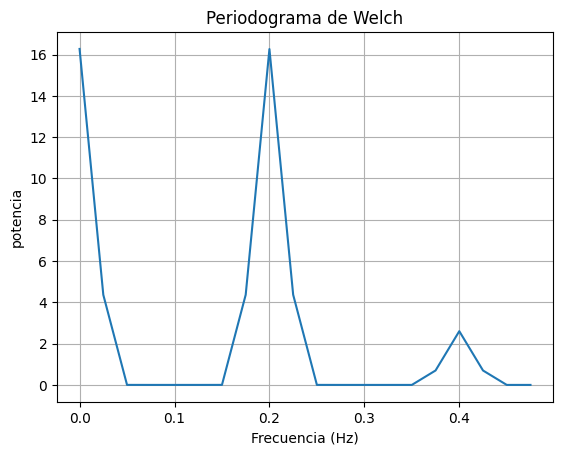

In [27]:
M = 40
S = 25
f, Pxx = welch(x, M, S, window='hanning')

plt.figure()
plt.plot(f, Pxx)
plt.title('Periodograma de Welch')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('potencia')
plt.grid(True)
plt.show()